# 모델생성과 성능평가 Lab

In [5]:
import numpy as np 
import pandas as pd 
import os

1. customer_scaled.csv 파일을 읽어서 customer_df에 저장하시오. 저장 후에 데이터의 특성을 탐색하시오.

In [6]:
# load data
customer_df = pd.read_csv('../../data/customer_scaled.csv')

In [7]:
# shape of dataframe
customer_df.shape

(18355, 26)

In [8]:
# dataframe dtypes for each feature
customer_df.dtypes

Gender                              float64
MaritalStatus                       float64
HomeOwnerFlag                       float64
NumberCarsOwned                     float64
NumberChildrenAtHome                float64
TotalChildren                       float64
YearlyIncome                        float64
BikeBuyer                           float64
AvgMonthSpend                       float64
Age                                 float64
CountryRegionName_Australia         float64
CountryRegionName_Canada            float64
CountryRegionName_France            float64
CountryRegionName_Germany           float64
CountryRegionName_United Kingdom    float64
CountryRegionName_United States     float64
Education_Bachelors                 float64
Education_Graduate Degree           float64
Education_High School               float64
Education_Partial College           float64
Education_Partial High School       float64
Occupation_Clerical                 float64
Occupation_Management           

2. BikeBuyer를 제외한 컬럼으로 입력변수들로, BikeBuyer를 출력변수로 하고, 훈련 데이터와 테스트 데이터를 8:2로 분할하시오.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(customer_df.drop(['BikeBuyer'],axis=1), customer_df['BikeBuyer'], test_size=0.2, random_state=42)
print('train data set size = {0},  test data set size = {1}'.format(X_train.shape[0],X_test.shape[0]))

train data set size = 14684,  test data set size = 3671


3. 분류 모델의 성능을 출력하는 함수 get_clf_eval()을 작성하시오.

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score, accuracy_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print("정확도: {0:.4f}. 재현율: {1:.4f}, 정밀도: {2:.4f}".format(accuracy, recall, precision))

4. sklearn 패키지를 이용하여 MLP 모형을 만들고 분류 성능을 평가하시오(단 히든 레이어는 (8,8)로 하시오).

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=300)
mlp_clf.fit(X_train , y_train)
mlp_pred = mlp_clf.predict(X_test)

In [14]:
get_clf_eval(y_test,mlp_pred)

confusion matrix
[[ 725  950]
 [ 456 1540]]
정확도: 0.6170. 재현율: 0.7715, 정밀도: 0.6185


5. keras를 이용해서 인공신경망 모델을 정의하고 학습하시오(단 히든 레이어는 (8,8)로 하시오).

In [15]:
from keras import models
from keras.layers import Input, Dense

In [16]:
# 모델 정의
model=models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 208       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# 학습 정의
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# 학습하기
history=model.fit(
  X_train,y_train,
  epochs=200,batch_size=128,
  validation_split=0.3, class_weight={0:1,1:0.81}
)

Epoch 1/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.4962 - val_loss: 0.6913 - val_accuracy: 0.5315
Epoch 2/200
81/81 [==============================] - 0s 890us/step - loss: 0.6183 - accuracy: 0.5331 - val_loss: 0.6901 - val_accuracy: 0.5452
Epoch 3/200
81/81 [==============================] - 0s 921us/step - loss: 0.6172 - accuracy: 0.5419 - val_loss: 0.6883 - val_accuracy: 0.5449
Epoch 4/200
81/81 [==============================] - 0s 992us/step - loss: 0.6158 - accuracy: 0.5522 - val_loss: 0.6875 - val_accuracy: 0.5502
Epoch 5/200
81/81 [==============================] - 0s 999us/step - loss: 0.6139 - accuracy: 0.5497 - val_loss: 0.6833 - val_accuracy: 0.5708
Epoch 6/200
81/81 [==============================] - 0s 911us/step - loss: 0.6118 - accuracy: 0.5703 - val_loss: 0.6829 - val_accuracy: 0.5649
Epoch 7/200
81/81 [==============================] - 0s 939us/step - loss: 0.6088 - accuracy: 0.5756 - val_loss: 0.6860 - val_accuracy: 0.5415
E

7. 학습 중 Loss 함수를 그리시오. 

In [19]:
history_dict=history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

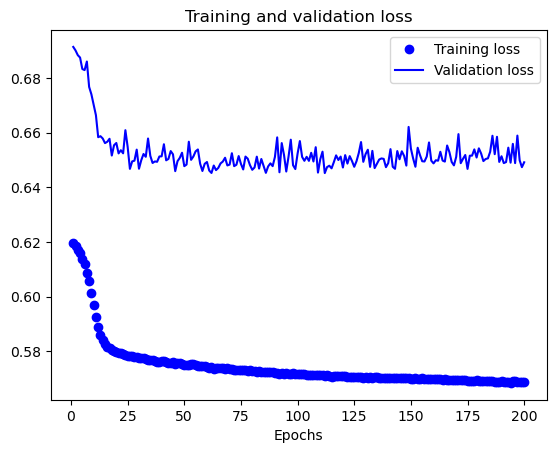

In [21]:
import matplotlib.pyplot as plt 

# Loss 함수 그리기
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

8. 학습 중 정확도 함수를 그리시오.

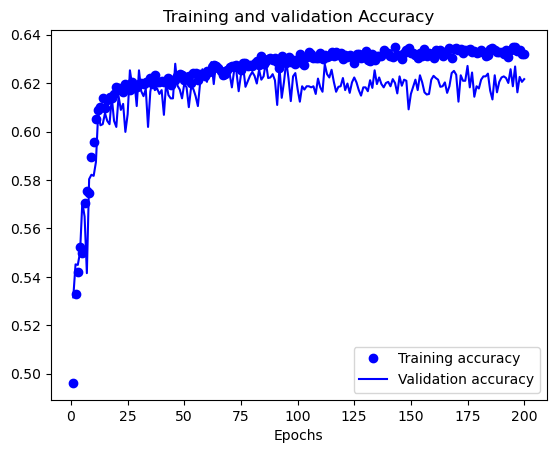

In [22]:
# 정확도 그리기
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

9. 테스트 데이터 집합에 대한 성능을 확인하시오.

In [23]:
# 예측
predicted_result=model.predict(X_test)
predicted_result.shape

115/115 [==============================] - 0s 406us/step


(3671, 1)

In [24]:
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 \
         else 0 for i in range(0,predicted_result.shape[0])])

In [25]:
get_clf_eval(y_test,predicted_target)

confusion matrix
[[ 851  824]
 [ 637 1359]]
정확도: 0.6020. 재현율: 0.6809, 정밀도: 0.6225
